In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import load_model
import keras.backend as K
from os.path import join
from scipy.ndimage import gaussian_filter
from glob import glob
import pickle

In [7]:
path = "/scratch/dgagne/spatial_storm_results_20171220/"
sorted(glob(join(path, "logistic_gan_*_encoder.h5")))

['/scratch/dgagne/spatial_storm_results_20171220/logistic_gan_0_encoder.h5',
 '/scratch/dgagne/spatial_storm_results_20171220/logistic_gan_10_encoder.h5',
 '/scratch/dgagne/spatial_storm_results_20171220/logistic_gan_11_encoder.h5',
 '/scratch/dgagne/spatial_storm_results_20171220/logistic_gan_12_encoder.h5',
 '/scratch/dgagne/spatial_storm_results_20171220/logistic_gan_13_encoder.h5',
 '/scratch/dgagne/spatial_storm_results_20171220/logistic_gan_14_encoder.h5',
 '/scratch/dgagne/spatial_storm_results_20171220/logistic_gan_15_encoder.h5',
 '/scratch/dgagne/spatial_storm_results_20171220/logistic_gan_16_encoder.h5',
 '/scratch/dgagne/spatial_storm_results_20171220/logistic_gan_17_encoder.h5',
 '/scratch/dgagne/spatial_storm_results_20171220/logistic_gan_18_encoder.h5',
 '/scratch/dgagne/spatial_storm_results_20171220/logistic_gan_19_encoder.h5',
 '/scratch/dgagne/spatial_storm_results_20171220/logistic_gan_1_encoder.h5',
 '/scratch/dgagne/spatial_storm_results_20171220/logistic_gan_20_e

In [8]:
gan_enc = load_model('/scratch/dgagne/spatial_storm_results_20171220/logistic_gan_0_encoder.h5')

In [46]:
gan_log_filename = "/scratch/dgagne/spatial_storm_results_20171220/logistic_gan_0_logistic.pkl"
with open(gan_log_filename, "rb") as gan_log_file:
    gan_log = pickle.load(gan_log_file)

/scratch/dgagne/miniconda3/envs/deep36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/scratch/dgagne/miniconda3/envs/deep36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [56]:
out = gan_enc.layers[-1].output[0, 2]
input_image = gan_enc.input
loss = 0.5 * (out - 3) ** 2
grads = K.gradients(loss, input_image)[0]
grads /= K.maximum(K.std(grads), K.epsilon())
iterate = K.function([input_image, K.learning_phase()], 
                     [loss, grads])
input_ex = np.zeros((1, 32 ,32 , 15))
for i in range(50):
    loss_val, grad_val = iterate([input_ex, 0])
    input_ex -= 0.01 * grad_val
    print(loss_val)

3.37472
2.22954
1.34371
0.702153
0.293162
0.0697176
7.71906e-06
0.0608188
4.9028e-06
0.0605409
2.93154e-06
0.0602774
1.52707e-06
0.0600303
6.09273e-07
0.0598085
1.17585e-07
0.0595614
1.31422e-08
0.0668271
2.75428e-07
0.0589734
2.50067e-08
0.0587864
3.24185e-08
0.0659067
2.40017e-07
0.058264
6.95222e-08
0.0581339
2.32478e-09
0.0580152
2.44236e-08
0.0650088
2.57675e-07
0.0575403
9.39373e-08
0.0574339
1.56058e-08
0.0573315
1.86265e-09
0.0641994
3.81558e-07
0.0568995
1.81063e-07
0.0568055
6.58384e-08
0.056712
9.29913e-09
0.0566285


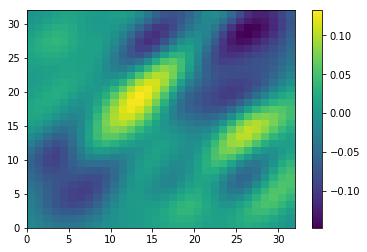

In [60]:
plt.pcolormesh(gaussian_filter(input_ex[0, :, :, 14], 1))
plt.colorbar()

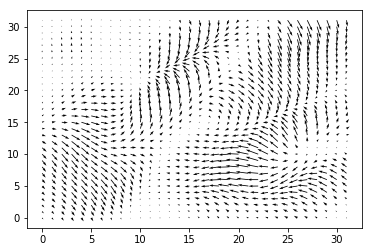

In [57]:
plt.quiver(gaussian_filter(input_ex[0, :, :, 11], 1), gaussian_filter(input_ex[0, :, :, 14], 1))

In [50]:
gan_log.coef_.argmax()

2